**Q2 Using the association rule mining techniques, build a recommendation system for thedataset provided to you. Your system should be able to recommend movies given a customer profile. i.e.what set of movies a customer has watched in the past? The set can contain any non-zero number ofmovies. Let us say a customer has seen "avengers, iron man", the system can recommend the following
movies "captain america, hulk, thor, doctor strange". The final scores will be computed using the metric"Precision@k". For a given customer profile, you will recommend four best movies, i.e. k=4**

In [ ]:
#importing pre-requisite libraries
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing datasets
df1=pd.read_csv('/content/drive/MyDrive/DMG Assignment 2/links.csv')
df2=pd.read_csv('/content/drive/MyDrive/DMG Assignment 2/movies.csv')
df3=pd.read_csv('/content/drive/MyDrive/DMG Assignment 2/ratings.csv')
df4=pd.read_csv('/content/drive/MyDrive/DMG Assignment 2/tags.csv')

In [ ]:
#displaying links dataset
df1.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
#displaying movies dataset
df2.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#displaying ratings dataset
df3.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#removing rows with ratings less than 2.5
df3Modified=df3.loc[df3['rating'] >= 2.5]
df3Modified.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#rows with rating less than 2.5
df3Modified2=df3.loc[df3['rating'] < 2.5]
df3Modified2.head()

,userId,movieId,rating,timestamp
76,1,1219,2.0,964983393
143,1,2253,2.0,964981775
148,1,2338,2.0,964983546
152,1,2389,2.0,964983094
170,1,2617,2.0,964982588


In [ ]:
#displaying tags dataset
df4.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
#removing rows from the tags dataset which have ratings less than 2.5 in the ratings data set
for rowNumber in range(len(df3Modified2)):
  lowUserId=int(df3Modified2.iloc[rowNumber][0])
  lowmovieId=int(df3Modified2.iloc[rowNumber][1])
  index_names = df4[ (df4['userId'] == lowUserId) & (df4['movieId'] == lowmovieId)].index
  df4.drop(index_names, inplace = True)

In [ ]:
#counting number of unique users in ratings dataset
unique_userIds3=df3Modified.userId.unique()
print("Number of unique userIds in ratings dataset:",len(unique_userIds3))

Number of unique userIds in ratings dataset: 610


In [ ]:
#counting number of unique users in tags dataset
unique_userIds4=df4.userId.unique()
print("Number of unique userIds in tags dataset:",len(unique_userIds4))

Number of unique userIds in tags dataset: 57


In [ ]:
#checking is there any user any user who is in tags dataset but not in ratings dataset
presentFlag=False
for ele2 in unique_userIds4:
   if ele2 not in unique_userIds3:
     presentFlag=True
     print(ele2," userId is present in tags dataset but not present in ratings dataset")
if(presentFlag==False):
  print("All userIds which are in tags dataset are also present in ratings dataset")   

All userIds which are in tags dataset are also present in ratings dataset


In [ ]:
#creating dictionary using ratings dataset in which key is userId and value is list containing movie Ids of all movies rated by that userID
unique_userIds3=df3Modified.userId.unique()
user_movies1=dict()
for ele in unique_userIds3:
  x=df3Modified.loc[df3['userId'] == ele]
  user_movies1[ele]=list(x['movieId'])


In [ ]:
#displaying userId with movie Ids of all movies rated by that user Id in ratings dataset
print("In ratings dataset:")
for element in user_movies1.keys():
  print("User Id:",element,"   Ids of Movie Rated:",user_movies1[element])

In ratings dataset:
User Id: 1    Ids of Movie Rated: [1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163, 216, 223, 231, 235, 260, 296, 316, 333, 349, 356, 362, 367, 423, 441, 457, 480, 500, 527, 543, 552, 553, 590, 592, 593, 596, 608, 648, 661, 673, 733, 736, 780, 804, 919, 923, 940, 943, 954, 1009, 1023, 1024, 1025, 1029, 1030, 1031, 1032, 1042, 1049, 1060, 1073, 1080, 1089, 1090, 1092, 1097, 1127, 1136, 1196, 1197, 1198, 1206, 1208, 1210, 1213, 1214, 1220, 1222, 1224, 1226, 1240, 1256, 1258, 1265, 1270, 1275, 1278, 1282, 1291, 1298, 1348, 1377, 1396, 1408, 1445, 1473, 1500, 1517, 1552, 1573, 1580, 1587, 1617, 1620, 1625, 1644, 1676, 1732, 1777, 1793, 1804, 1805, 1920, 1927, 1954, 1967, 2000, 2005, 2012, 2018, 2028, 2033, 2046, 2048, 2054, 2058, 2078, 2090, 2093, 2094, 2096, 2099, 2105, 2115, 2116, 2137, 2139, 2141, 2143, 2161, 2174, 2193, 2268, 2273, 2291, 2329, 2353, 2366, 2387, 2395, 2406, 2414, 2427, 2450, 2459, 2470, 2478, 2492, 2502, 2528, 2529, 2542, 2571, 2580, 2596, 2616, 2628, 2

In [ ]:
#creating dictionary using tags dataset in which key is userId and value is list containing all movie Ids of movies tagged by that userID
unique_userIds4=df4.userId.unique()
user_movies2=dict()
for ele in unique_userIds4:
  x=df4.loc[df4['userId'] == ele]
  user_movies2[ele]=list(x['movieId'])

In [ ]:
#displaying userId with movie Ids of all movies tagged by that user Id in tags dataset
print("In tags dataset:")
for element in user_movies2.keys():
  print("User Id:",element,"   Ids of Movie Tagged:",user_movies2[element])

In tags dataset:
User Id: 2    Ids of Movie Tagged: [60756, 60756, 60756, 89774, 89774, 89774, 106782, 106782, 106782]
User Id: 18    Ids of Movie Tagged: [431, 431, 431, 1221, 1221, 5995, 5995, 44665, 52604, 52604, 52604, 88094, 88094, 88094, 144210, 144210]
User Id: 21    Ids of Movie Tagged: [1569, 1569, 118985]
User Id: 49    Ids of Movie Tagged: [109487, 109487, 109487]
User Id: 62    Ids of Movie Tagged: [2, 2, 2, 110, 110, 110, 110, 110, 110, 110, 110, 110, 410, 410, 410, 410, 410, 410, 2023, 2023, 2023, 2023, 2023, 2124, 2124, 2124, 2124, 2124, 2124, 2953, 2953, 2953, 2953, 3114, 3114, 3114, 3114, 3114, 3114, 3114, 3578, 3578, 3578, 3578, 3578, 3578, 3578, 4223, 4223, 4223, 4223, 4223, 5388, 5388, 5388, 5388, 6058, 6058, 6534, 6534, 6534, 6534, 6541, 6541, 6541, 6541, 6541, 6541, 6564, 6564, 6564, 7153, 7153, 7153, 7153, 7153, 7153, 7153, 7153, 7153, 8641, 8641, 8641, 27660, 27660, 27660, 27660, 27660, 27660, 27706, 27706, 27706, 27706, 27706, 27808, 27808, 27808, 27831, 27831,

In [ ]:
#creating dictionary which contains userId and list of Ids of all movies rated or tagged using the above two dictionaries
final_dict=dict()
for x1 in user_movies1.keys():
  if x1 not in user_movies2.keys():
    final_dict[x1]=user_movies1[x1]
  else:
    movies_list=list(user_movies1[x1]+user_movies2[x1])
    final_unique_movie_list=list()
    for i in movies_list:
	    if i not in final_unique_movie_list:
		    final_unique_movie_list.append(i)
    final_dict[x1]=final_unique_movie_list

In [ ]:
#creating dataframe from above dictionary to visualise
df6=pd.DataFrame()
df6['USERID']=final_dict.keys()
df6['Movie Ids of Movie Tagged or Rated']=final_dict.values()
df6=df6.set_index('USERID')

userMovieGenres=list()

for row3 in range(len(df6)):
  z=list()
  moviess=df6.iloc[row3][0]
  for moviee in moviess:
    movieRoww=df2.loc[df2['movieId'] == moviee]
    movieGenres=movieRoww.iloc[0][2].split("|")
    for nn in movieGenres:
      if nn not in z:
        z.append(nn)
  userMovieGenres.append(z) 

df6['Genre']=userMovieGenres

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
df6.head(10)


,Movie Ids of Movie Tagged or Rated,Genre
USERID,,
1,"[1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163,...","[Adventure, Animation, Children, Comedy, Fanta..."
2,"[318, 333, 1704, 3578, 6874, 8798, 46970, 4851...","[Crime, Drama, Comedy, Romance, Action, Advent..."
3,"[849, 1275, 1371, 1587, 2288, 2851, 3024, 3703...","[Action, Adventure, Sci-Fi, Thriller, Fantasy,..."
4,"[21, 45, 52, 58, 106, 125, 162, 171, 176, 215,...","[Comedy, Crime, Thriller, Drama, Romance, Docu..."
5,"[1, 21, 34, 36, 39, 50, 58, 110, 150, 153, 232...","[Adventure, Animation, Children, Comedy, Fanta..."
6,"[2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 15, 16, 17, ...","[Adventure, Children, Fantasy, Comedy, Romance..."
7,"[1, 50, 58, 150, 165, 260, 356, 380, 466, 480,...","[Adventure, Animation, Children, Comedy, Fanta..."
8,"[2, 11, 21, 32, 34, 39, 47, 50, 110, 141, 150,...","[Adventure, Children, Fantasy, Comedy, Drama, ..."
9,"[41, 187, 223, 371, 627, 922, 923, 1095, 1198,...","[Drama, War, Comedy, Thriller, Film-Noir, Roma..."


In [ ]:
#creating list that contains list of IDs of movie tagged or rated by the single user
moviesList=list()
for ite in df6['Movie Ids of Movie Tagged or Rated']:
  moviesList.append(ite)

movies=moviesList

In [ ]:
#implementing apriori algorithm and its pre-requisite functions
from csv import reader
from collections import defaultdict
from itertools import chain, combinations

def dataToCSV(fname):
    first = True
    currentID = 1
    with open(fname, 'r') as dataFile, open(fname + '.csv', 'w') as outputCSV:
        for line in dataFile:
            nums = line.split()
            itemSetID = nums[1]
            item = nums[2]
            if(int(itemSetID) == currentID):
                if(first):
                    outputCSV.write(item)
                else:
                    outputCSV.write(',' + item)
                first = False
            else:
                outputCSV.write('\n' + item)
                currentID += 1


def powerset(s):
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)))


def getFromFile(fname):
    itemSets = []
    itemSet = set()

    with open(fname, 'r') as file:
        csv_reader = reader(file)
        for line in csv_reader:
            line = list(filter(None, line))
            record = set(line)
            for item in record:
                itemSet.add(frozenset([item]))
            itemSets.append(record)
    return itemSet, itemSets


def getAboveMinSup(itemSet, itemSetList, minSup, globalItemSetWithSup):
    freqItemSet = set()
    localItemSetWithSup = defaultdict(int)

    for item in itemSet:
        for itemSet in itemSetList:
            if item.issubset(itemSet):
                globalItemSetWithSup[item] += 1
                localItemSetWithSup[item] += 1

    for item, supCount in localItemSetWithSup.items():
        support = float(supCount / len(itemSetList))
        if(support >= minSup):
            freqItemSet.add(item)

    return freqItemSet


def getUnion(itemSet, length):
    return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])


def pruning(candidateSet, prevFreqSet, length):
    tempCandidateSet = candidateSet.copy()
    for item in candidateSet:
        subsets = combinations(item, length)
        for subset in subsets:
            # if the subset is not in previous K-frequent get, then remove the set
            if(frozenset(subset) not in prevFreqSet):
                tempCandidateSet.remove(item)
                break
    return tempCandidateSet


def associationRule(freqItemSet, itemSetWithSup, minConf):
    rules = []
    for k, itemSet in freqItemSet.items():
        for item in itemSet:
            subsets = powerset(item)
            for s in subsets:
                confidence = float(
                    itemSetWithSup[item] / itemSetWithSup[frozenset(s)])
                if(confidence > minConf):
                    rules.append([set(s), set(item.difference(s)), confidence])
    return rules


def getItemSetFromList(itemSetList):
    tempItemSet = set()

    for itemSet in itemSetList:
        for item in itemSet:
            tempItemSet.add(frozenset([item]))

    return tempItemSet

In [ ]:
from csv import reader
from collections import defaultdict
from itertools import chain, combinations
from optparse import OptionParser


def apriori(itemSetList, minSup, minConf):
    C1ItemSet = getItemSetFromList(itemSetList)
    # Final result global frequent itemset
    globalFreqItemSet = dict()
    # Storing global itemset with support count
    globalItemSetWithSup = defaultdict(int)

    L1ItemSet = getAboveMinSup(
        C1ItemSet, itemSetList, minSup, globalItemSetWithSup)
    currentLSet = L1ItemSet
    k = 2

    # Calculating frequent item set
    while(currentLSet):
        # Storing frequent itemset
        globalFreqItemSet[k-1] = currentLSet
        # Self-joining Lk
        candidateSet = getUnion(currentLSet, k)
        # Perform subset testing and remove pruned supersets
        candidateSet = pruning(candidateSet, currentLSet, k-1)
        # Scanning itemSet for counting support
        currentLSet = getAboveMinSup(
            candidateSet, itemSetList, minSup, globalItemSetWithSup)
        k += 1

    rules = associationRule(globalFreqItemSet, globalItemSetWithSup, minConf)
    rules.sort(key=lambda x: x[2])

    return globalFreqItemSet, rules

def aprioriFromFile(fname, minSup, minConf):
    C1ItemSet, itemSetList = getFromFile(fname)

    # Final result global frequent itemset
    globalFreqItemSet = dict()
    # Storing global itemset with support count
    globalItemSetWithSup = defaultdict(int)

    L1ItemSet = getAboveMinSup(
        C1ItemSet, itemSetList, minSup, globalItemSetWithSup)
    currentLSet = L1ItemSet
    k = 2

    # Calculating frequent item set
    while(currentLSet):
        # Storing frequent itemset
        globalFreqItemSet[k-1] = currentLSet
        # Self-joining Lk
        candidateSet = getUnion(currentLSet, k)
        # Perform subset testing and remove pruned supersets
        candidateSet = pruning(candidateSet, currentLSet, k-1)
        # Scanning itemSet for counting support
        currentLSet = getAboveMinSup(
            candidateSet, itemSetList, minSup, globalItemSetWithSup)
        k += 1

    rules = associationRule(globalFreqItemSet, globalItemSetWithSup, minConf)
    rules.sort(key=lambda x: x[2])

    return globalFreqItemSet, rules

if __name__ == "__main__":
    optparser = OptionParser()
    optparser.add_option('-f', '--inputFile',
                         dest='inputFile',
                         help='CSV filename',
                         default=None)
    optparser.add_option('-s', '--minSupport',
                         dest='minSup',
                         help='Min support (float)',
                         default=0.5,
                         type='float')
    optparser.add_option('-c', '--minConfidence',
                         dest='minConf',
                         help='Min confidence (float)',
                         default=0.5,
                         type='float')

    (options, args) = optparser.parse_args()

    freqItemSet, rules = aprioriFromFile(options.inputFile, options.minSup, options.minConf)

In [ ]:
def getUnion(itemSet, length):
    return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])

In [ ]:
def pruning(candidateSet, prevFreqSet, length):
    tempCandidateSet = candidateSet.copy()
    for item in candidateSet:
        subsets = combinations(item, length)
        for subset in subsets:
            # if the subset is not in previous K-frequent get, then remove the set
            if(frozenset(subset) not in prevFreqSet):
                tempCandidateSet.remove(item)
                break
    return tempCandidateSet

In [ ]:
def getAboveMinSup(itemSet, itemSetList, minSup, globalItemSetWithSup):
    freqItemSet = set()
    localItemSetWithSup = defaultdict(int)

    for item in itemSet:
        for itemSet in itemSetList:
            if item.issubset(itemSet):
                globalItemSetWithSup[item] += 1
                localItemSetWithSup[item] += 1

    for item, supCount in localItemSetWithSup.items():
        support = float(supCount / len(itemSetList))
        if(support >= minSup):
            freqItemSet.add(item)

    return freqItemSet

In [ ]:
#applying apriori algorithm on movies list created above which minimum Support=0.2 and minimum Confidence=0.4
globalFreqItemSets, associationRules=apriori(movies, 0.2, 0.4)

In [ ]:
#creating dataframe of frequent item sets generated
lengths=list()
itemsets=list()

for curlen in globalFreqItemSets.keys():
  itemsetsOfLengthX=list(globalFreqItemSets[curlen])
  for curItemSet in itemsetsOfLengthX:
    lengths.append(curlen)
    itemsets.append(curItemSet)
 
frequentItemsetsDataframe=pd.DataFrame()
frequentItemsetsDataframe['Frequent Itemset(Movie Ids)']=itemsets
frequentItemsetsDataframe['Length']=lengths
#frequentItemsetsDataframe=frequentItemsetsDataframe.set_index('Frequent Itemset')

In [ ]:
#displaying frequent item sets
frequentItemsetsDataframe

,Frequent Itemset(Movie Ids),Length
0,(1265),1
1,(1193),1
2,(1580),1
3,(32),1
4,(2571),1
...,...,...
238,"(296, 356, 318)",3
239,"(2571, 356, 318)",3
240,"(356, 318, 2959)",3
241,"(260, 1210, 2571, 1196)",4


In [ ]:
#converting inner elements of associations rules type from sets to list
for x in range(len(associationRules)):
  associationRules[x][0]=list(associationRules[x][0])
for x in range(len(associationRules)):
  associationRules[x][1]=list(associationRules[x][1])  

In [ ]:
#creating dataframe of association rules generated
lhs=list()
rhs=list()
confidence=list()

for x in range(len(associationRules)):
  lhs.append(associationRules[x][0])
  rhs.append(associationRules[x][1])
  confidence.append("{0:.3f}".format(associationRules[x][2]))

associationRulesDataframe=pd.DataFrame()
associationRulesDataframe['Antecedents(Movie Ids)']=lhs
associationRulesDataframe['Consequents(Movie Ids)']=rhs
associationRulesDataframe['Confidence']=confidence
associationRulesDataframe=associationRulesDataframe.set_index('Antecedents(Movie Ids)')

In [ ]:
#displaying association rules
associationRulesDataframe.head(150)

,Consequents(Movie Ids),Confidence
Antecedents(Movie Ids),,
[356],"[480, 110]",0.403
[318],[4993],0.403
[318],[1196],0.403
[318],"[2571, 2959]",0.403
[318],"[296, 2571]",0.403
...,...,...
[593],"[356, 318]",0.544
[110],[150],0.545
[110],"[593, 356]",0.545


Recommendation System

In [ ]:
#Taking input movies list from the df6 dataframe created above and recommending movies and storing in dataframe called output
from operator import itemgetter

outputFrame = pd.DataFrame(columns = ['Input(Movie Ids)', 'Output(Movie Ids)'])
for input_movie_row in range(len(df6)):
  input_movie_list=list(df6.iloc[input_movie_row][0])
  useful_rules=list()
  for ele in input_movie_list:
    for x in range(len(associationRules)):
      if ele in associationRules[x][0]:
        if associationRules[x] not in useful_rules:
          useful_rules.append(associationRules[x])
      if ele in associationRules[x][1]:
        if associationRules[x] not in useful_rules:
          useful_rules.append(associationRules[x])
  useful_rules=sorted(useful_rules, key=itemgetter(2))
  count=0
  flag=0
  recommened_movies=list()
  for rule_no in range(len(useful_rules)-1,0,-1):
    cur_rule_movies=useful_rules[rule_no][0]+useful_rules[rule_no][1]
    for mov in cur_rule_movies:
      if mov not in input_movie_list:
        if mov not in recommened_movies:
          recommened_movies.append(mov)
          count=count+1
        if(count==4):
          flag=1
          break
    if(flag==1):
      break
  outputFrame.loc[input_movie_row] = [input_movie_list, recommened_movies]

In [ ]:
#Evaluatig precision
precisions=list()
for curRow in range(len(outputFrame)):
  precisionCount=0
  inputgenre=df6.iloc[curRow][1]
  inferencegenre=list()
  curRecommenedMoviesList=list(outputFrame.iloc[curRow][1])
  if(len(curRecommenedMoviesList)==0):
    precisions.append(1.0)
    continue
  for singleMovie in curRecommenedMoviesList:
    movieRoww=df2.loc[df2['movieId'] == singleMovie]
    movieGenres=movieRoww.iloc[0][2].split("|")
    flag=False
    for nn in movieGenres:
      if nn in inputgenre:
        flag=True
        break
    if flag==True:
      precisionCount=precisionCount+1
  precisions.append(precisionCount/len(curRecommenedMoviesList))

In [ ]:
#adding precision column in outputFrame dataframe
outputFrame['Precision']=precisions

In [ ]:
outputFrame.head()

,Input(Movie Ids),Output(Movie Ids),Precision
0,"[1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163,...","[318, 5952, 4993, 7153]",1.0
1,"[318, 333, 1704, 3578, 6874, 8798, 46970, 4851...","[480, 356, 47, 296]",1.0
2,"[849, 1275, 1371, 1587, 2288, 2851, 3024, 3703...",[],1.0
3,"[21, 45, 52, 58, 106, 125, 162, 171, 176, 215,...","[1210, 2571, 296, 356]",1.0
4,"[1, 21, 34, 36, 39, 50, 58, 110, 150, 153, 232...","[1196, 260, 480, 356]",1.0


In [ ]:
#extracting movie name by using movieId using the movies dataset
df8=pd.DataFrame(columns = ['Input', 'Inference','Precision'])
inputMovieList=list()
recommenedMoviesList=list()

for curRow in range(len(outputFrame)):
  curInputMovieList=list(outputFrame.iloc[curRow][0])
  x2=list()
  curRecommenedMoviesList=list(outputFrame.iloc[curRow][1])
  y2=list()
  for a in curInputMovieList:
    movieName1=df2.loc[df2['movieId'] == a]
    x2.append(movieName1.iloc[0][1])
  for b in curRecommenedMoviesList:
    movieName2=df2.loc[df2['movieId'] == b]
    y2.append(movieName2.iloc[0][1])
  inputMovieList.append(x2)
  recommenedMoviesList.append(y2)

In [ ]:
#adding columns to final output dataframe
df8['Input']=inputMovieList
df8['Inference']=recommenedMoviesList
df8['Precision']=outputFrame['Precision']

In [ ]:
#displaying final output dataframe
df8.head(10)

,Input,Inference,Precision
0,"[Toy Story (1995), Grumpier Old Men (1995), He...","[Shawshank Redemption, The (1994), Lord of the...",1.0
1,"[Shawshank Redemption, The (1994), Tommy Boy (...","[Jurassic Park (1993), Forrest Gump (1994), Se...",1.0
2,"[Escape from L.A. (1996), Highlander (1986), S...",[],1.0
3,"[Get Shorty (1995), To Die For (1995), Mighty ...",[Star Wars: Episode VI - Return of the Jedi (1...,1.0
4,"[Toy Story (1995), Get Shorty (1995), Babe (19...",[Star Wars: Episode V - The Empire Strikes Bac...,1.0
5,"[Jumanji (1995), Grumpier Old Men (1995), Wait...",[Star Wars: Episode V - The Empire Strikes Bac...,1.0
6,"[Toy Story (1995), Usual Suspects, The (1995),...",[Raiders of the Lost Ark (Indiana Jones and th...,1.0
7,"[Jumanji (1995), American President, The (1995...",[Star Wars: Episode V - The Empire Strikes Bac...,1.0
8,"[Richard III (1995), Party Girl (1995), Clerks...",[Star Wars: Episode V - The Empire Strikes Bac...,1.0
9,"[Forrest Gump (1994), Aladdin (1992), Pretty W...","[Jurassic Park (1993), Shawshank Redemption, T...",1.0


In [ ]:
#Evaluation of the precision of the recommended system
modelPrecision=sum(precisions)/len(precisions)
print("The precision of the recommended model is:","{0:.4f}".format(modelPrecision))

The precision of the recommended model is: 0.9992


In [ ]:
#creating csv for output dataframe
df8.drop(columns=['Precision'],inplace=True)
df8.to_csv("Output.csv",index=False)

**Q3 Visualize the maximal frequent pattern set (Method 1)**

In [ ]:
#finding all unique lengths of itemsets possible
freqItemsets=list(frequentItemsetsDataframe['Frequent Itemset(Movie Ids)'])
uniqueItemsetsLength=list()
for eachSetNumber in range(len(freqItemsets)):
  if(len(freqItemsets[eachSetNumber]) not in uniqueItemsetsLength):
    uniqueItemsetsLength.append(len(freqItemsets[eachSetNumber]))

print("Unique lengths of frequent itemsets possible are:",uniqueItemsetsLength)

Unique lengths of frequent itemsets possible are: [1, 2, 3, 4]


In [ ]:
#Storing all frequent itemsets in separate list
freqItemsets=list(frequentItemsetsDataframe['Frequent Itemset(Movie Ids)'])

In [ ]:
#Converting each itemset type from frozenset to list
for eachSetNumber in range(len(freqItemsets)):
  freqItemsets[eachSetNumber]=list(freqItemsets[eachSetNumber])

In [ ]:
#Finding maximal frequent itemsets
maximalFreqItemset=list()
maximalFreqItemsetLength=list()
for curFreqItemSet in freqItemsets:
  if(len(curFreqItemSet)==1):
    flag=True
    for iterItemSet in freqItemsets:
      if(len(iterItemSet)==2 and curFreqItemSet in iterItemSet):
        flag=False
    if(flag==True):
      maximalFreqItemset.append(curFreqItemSet)
      maximalFreqItemsetLength.append(1)
  elif(len(curFreqItemSet)==2):
    flag=True
    for iterItemSet in freqItemsets:
      if(len(iterItemSet)==3 and curFreqItemSet[0] in iterItemSet and curFreqItemSet[1] in iterItemSet):
        flag=False
    if(flag==True):
      maximalFreqItemset.append(curFreqItemSet)
      maximalFreqItemsetLength.append(2)
  elif(len(curFreqItemSet)==3):
    flag=True
    for iterItemSet in freqItemsets:
      if(len(iterItemSet)==4 and curFreqItemSet[0] in iterItemSet and curFreqItemSet[1] in iterItemSet and curFreqItemSet[2] in iterItemSet):
        flag=False
    if(flag==True):
      maximalFreqItemset.append(curFreqItemSet)
      maximalFreqItemsetLength.append(3)
  elif(len(curFreqItemSet)==4):
    maximalFreqItemset.append(curFreqItemSet)
    maximalFreqItemsetLength.append(4)

In [ ]:
#Creating dataFrame for maximal Frequent itemsets
maximalFreqItemsetDataFrame=pd.DataFrame()
maximalFreqItemsetDataFrame['Maximal Frequent Itemset(Movie Ids)']=maximalFreqItemset
maximalFreqItemsetDataFrame['Length']=maximalFreqItemsetLength

In [ ]:
#displaying maximalFreqItemsetDataFrame
maximalFreqItemsetDataFrame

,Maximal Frequent Itemset(Movie Ids),Length
0,[1265],1
1,[1193],1
2,[1580],1
3,[32],1
4,[2571],1
...,...,...
174,"[296, 1196, 260]",3
175,"[2571, 356, 318]",3
176,"[356, 318, 2959]",3
177,"[260, 1210, 2571, 1196]",4


**Q3 Visualize the maximal frequent pattern set (Method 2)**

In [ ]:
#Storing all maximal frequent itemsets in separate list
maxFreqItemsets=list(maximalFreqItemsetDataFrame['Maximal Frequent Itemset(Movie Ids)'])

In [ ]:
#Converting each itemset type from frozenset to list
for eachSetNumber in range(len(maxFreqItemsets)):
  maxFreqItemsets[eachSetNumber]=tuple(maxFreqItemsets[eachSetNumber])

In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()

In [ ]:
oneLengthMax=list()
twoLengthMax=list()
threeLengthMax=list()
fourLengthMax=list()
for eachle in maxFreqItemsets:
  if(len(eachle)==1):
    oneLengthMax.append(eachle)
  elif(len(eachle)==2):
    twoLengthMax.append(eachle)
  elif(len(eachle)==3):
    threeLengthMax.append(eachle)
  elif(len(eachle)==4):
    fourLengthMax.append(eachle)


In [ ]:
color_map=[]
for eachEle in oneLengthMax:
  G.add_node(eachEle)
  color_map.append('yellow')

for eachEle in twoLengthMax:
  G.add_node(eachEle)
  color_map.append('yellow')

for eachEle in threeLengthMax:
  G.add_node(eachEle)
  color_map.append('yellow')

for eachEle in fourLengthMax:
  G.add_node(eachEle)
  color_map.append('yellow')

In [ ]:
freqItemsets=list(frequentItemsetsDataframe['Frequent Itemset(Movie Ids)'])
nonMaximal=list()
for eachx in freqItemsets:
  if eachx not in maxFreqItemsets:
    nonMaximal.append(eachx)

In [ ]:
oneNonMaximal=list()
twoNonMaximal=list()
threeNonMaximal=list()
fourNonMaximal=list()
for eachle in nonMaximal:
  if(len(eachle)==1):
    oneNonMaximal.append(eachle)
  elif(len(eachle)==2):
    twoNonMaximal.append(eachle)
  elif(len(eachle)==3):
    threeNonMaximal.append(eachle)
  elif(len(eachle)==4):
    fourNonMaximal.append(eachle)

In [ ]:

for eachEle in oneNonMaximal:
  G.add_node(eachEle)
  color_map.append('black')

for eachEle in twoNonMaximal:
  G.add_node(eachEle)
  color_map.append('black')

for eachEle in threeNonMaximal:
  G.add_node(eachEle)
  color_map.append('black')

for eachEle in fourNonMaximal:
  G.add_node(eachEle)
  color_map.append('black')

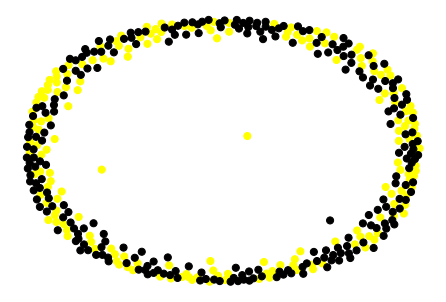

In [ ]:
nx.draw(G, node_color=color_map,node_size=50)